In [21]:
from model_trainer import *
import pickle 
from lightgbm import plot_importance
from model_trainer import *

In [22]:
with open('best_lightgbm_vars_armando_1803_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
with open('label_encoder_lightgbm_vars_armando_1803.pkl', 'rb') as f:
    encoder = pickle.load(f)

In [5]:
with open('./matrices_anterior_dataset_train/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)
with open('./matrices_anterior_dataset_train/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

In [6]:
preds = model.predict(X_test)

In [7]:
cm = confusion_matrix(y_test, preds)

Normalized confusion matrix


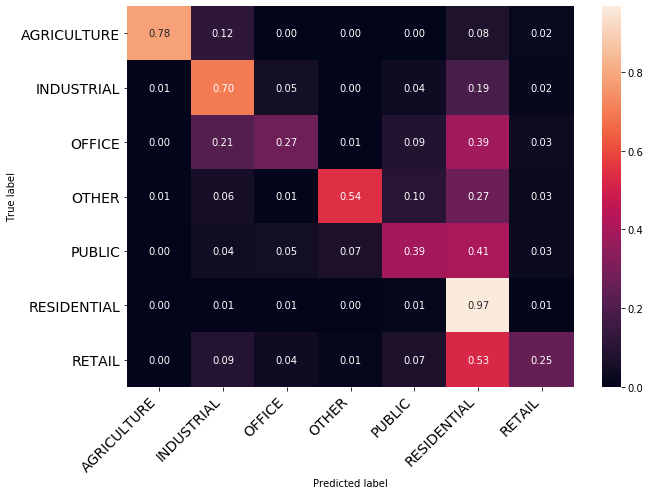

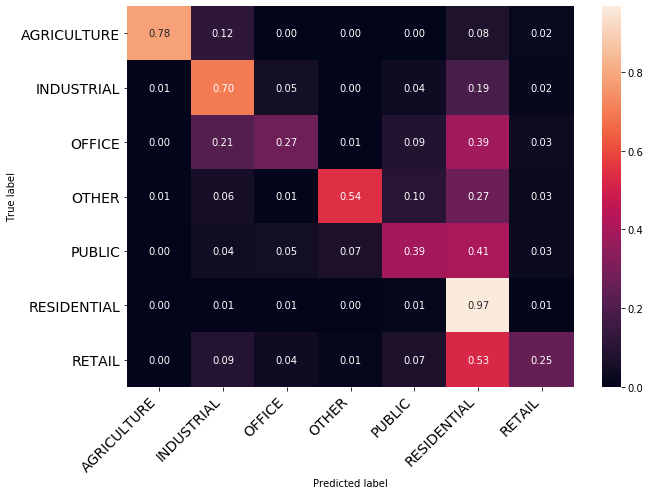

In [8]:
print_confusion_matrix(cm, class_names = encoder.classes_)

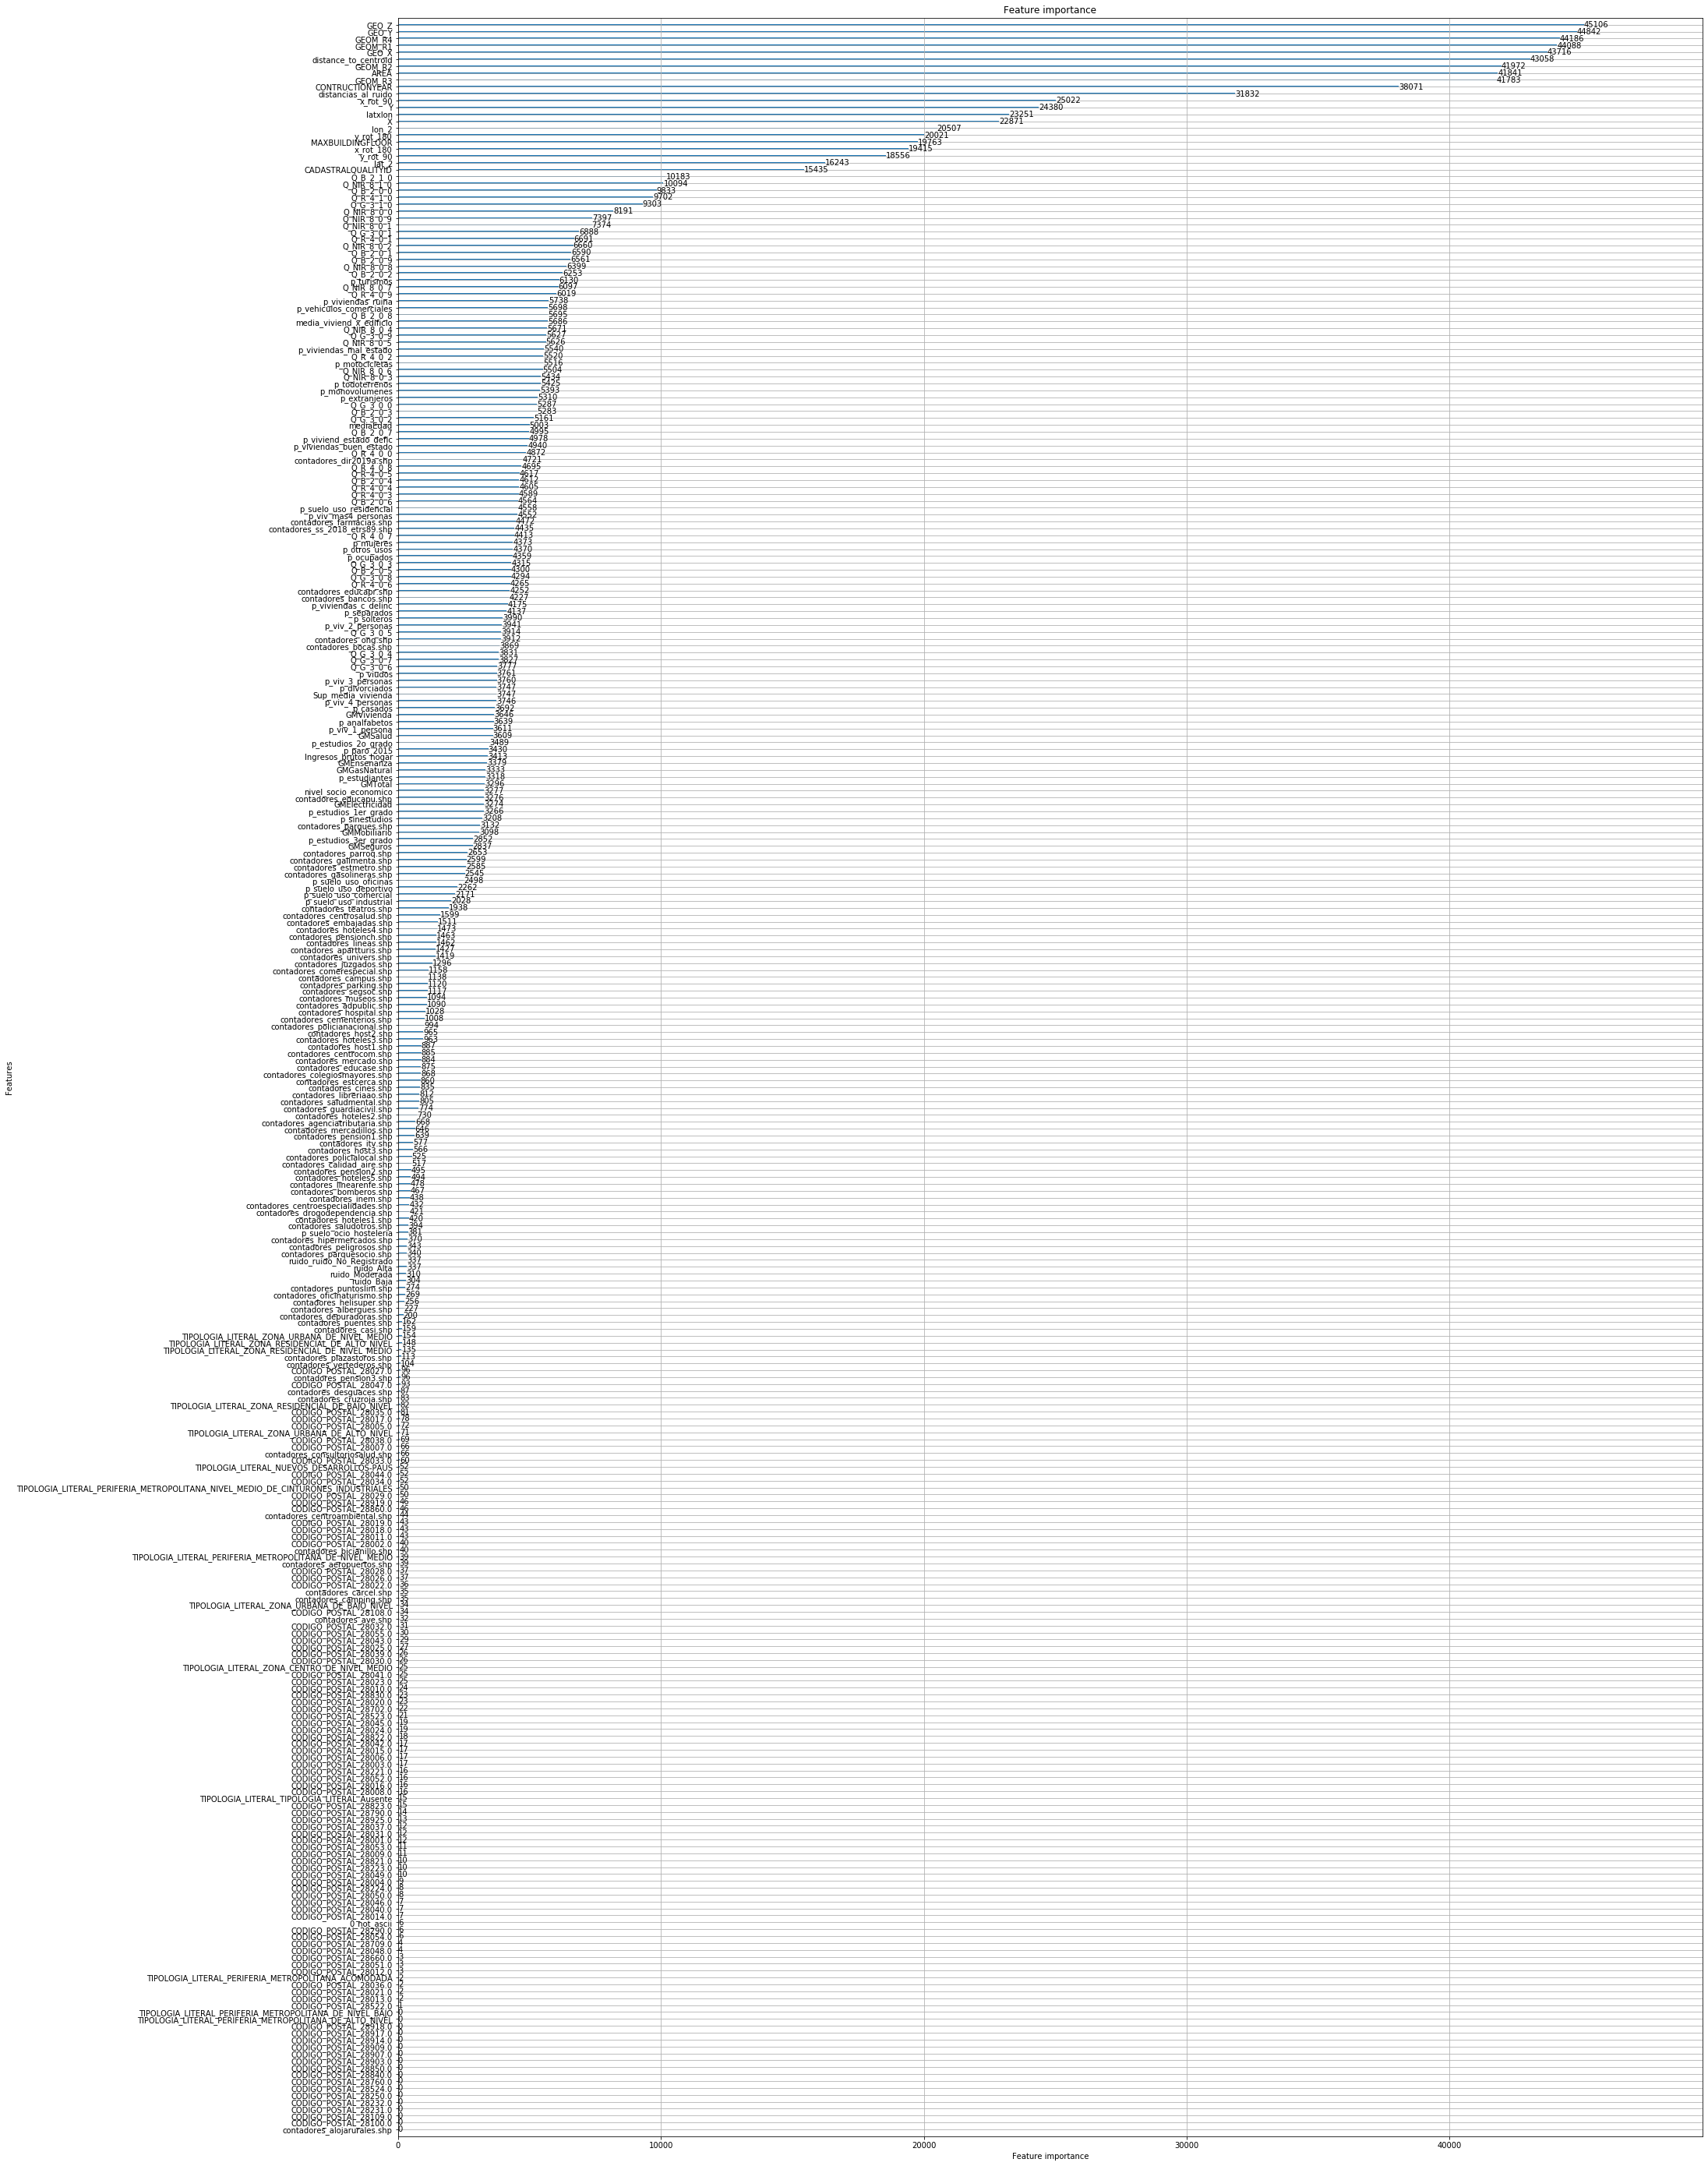

In [13]:
fig = plot_importance(model.best_estimator_, figsize=(30, 50), ignore_zero=False)

In [14]:
import matplotlib.pyplot as plt

In [17]:
fig.figure.savefig('feature_importances_vars_armando.png')

In [23]:
X, y, encoder = preprocess_data('TOTAL_TRAIN.csv', process_cat=True)

/home/alejandro.vaca/miniconda/envs/sentinel_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
  0%|          | 0/103230 [00:00<?, ?it/s]/home/alejandro.vaca/miniconda/envs/sentinel_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
  0%|          | 181/103230 [00:00<00:57, 1804.45it/s]

Valores unicos de CADASTRAL--- ['2' '3' '7' '4' '5' '8' '6' '1' '9' 'C' 6 5 4 7 8 9 3 2 'A' 1 'B' nan]


100%|██████████| 103230/103230 [00:49<00:00, 2099.10it/s]


En momento 2 el shape es de (103230, 192)
Las columnas que tienen dtype object son Index(['ruido', 'CODIGO_POSTAL', 'TIPOLOGIA_LITERAL'], dtype='object')
En momento 3 el shape es de (103230, 303)
Imputando valores con Random Forest
Iteration: 0
Iteration: 1
En momento 4 el shape es de (103230, 303)
En momento 5 el shape es de (103230, 313)
En momento 6 el shape es de (103230, 313)


In [27]:
good_colnames = []
i = 0
for col in X.columns:
    if not col.isascii():
        print(f'La columna {col} no es ascii')
        good_colnames.append(f'{i}_not_ascii')
        i+=1
    else:
        good_colnames.append(col)

La columna TIPOLOGIA_LITERAL_PEQUEÑOS MUNICIPIOS DE ALTO NIVEL ECONÓMICO no es ascii
La columna TIPOLOGIA_LITERAL_ZONAS DE LUJO/ÉLITE no es ascii


In [28]:
X.columns = good_colnames

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=15, stratify=y)

In [31]:
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
preds = model.predict(X_test)

In [ ]:
f1_score(y_test, preds, average='macro')

In [32]:
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

In [33]:
with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

In [34]:
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

In [35]:
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

In [36]:
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)